# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import openweathermapy.core as owm
from requests.exceptions import HTTPError


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
city_weather_data = "../CSV/city_weather.data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#test np.random for lat and long
lat1 = np.random.uniform(low = 0.000, high = 90, size = 10 )
print(lat1)
long1 = np.random.uniform(low = 0.000, high = 180.000, size = 10)
print(long1)

[11.20896921 73.60454198 19.08799544 28.00610951 85.85474222 80.21380033
 74.97902153  5.28927586 27.0512032  24.34016705]
[150.54583309 121.46498028  25.98357394  18.54286908  61.56112095
 163.81851166  13.68464643  97.62820789 144.50636098 121.03528973]


In [3]:
#testing the zip of the two variables, convert to a list to print
#lat_long1 = []
lat_long1 = list(zip(lat1, long1))
lat_long1

[(11.208969214156987, 150.54583308563699),
 (73.60454198007092, 121.46498028033002),
 (19.087995444705697, 25.983573943097984),
 (28.006109512374177, 18.542869082789984),
 (85.85474222043479, 61.56112094783337),
 (80.21380033081715, 163.81851165536727),
 (74.97902153465873, 13.68464642825948),
 (5.289275861957794, 97.62820788598384),
 (27.051203201151026, 144.50636097565322),
 (24.34016705334514, 121.03528973102085)]

In [4]:
#not part of homework
#test code to learn more about citipy, could not find more reference material for other calls you can make beside nearest city, name
cities1 = []
for x in lat_long1:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities1:
        cities1.append(city)
        


In [5]:
#print(cities1)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [11]:
print(cities)

['punta arenas', 'mount isa', 'chuy', 'carmen', 'ushuaia', 'rikitea', 'airai', 'belushya guba', 'shakiso', 'padang', 'paamiut', 'biak', 'cabo san lucas', 'cape town', 'hami', 'raga', 'kapaa', 'mataura', 'bluff', 'atuona', 'mehran', 'tuktoyaktuk', 'hilo', 'cherskiy', 'christchurch', 'barentsburg', 'barrow', 'taolanaro', 'skibbereen', 'ribeira grande', 'jamestown', 'okha', 'puerto baquerizo moreno', 'lasa', 'louisbourg', 'vaitupu', 'thompson', 'faanui', 'cah ab', 'aklavik', 'evensk', 'ishinomaki', 'arraial do cabo', 'ihosy', 'seoul', 'saldanha', 'ahar', 'port lincoln', 'hithadhoo', 'bairiki', 'hobart', 'katsuura', 'vaini', 'atagay', 'iqaluit', 'hermanus', 'avarua', 'albany', 'port-cartier', 'marawi', 'dikson', 'acapulco', 'kodiak', 'los llanos de aridane', 'porciuncula', 'praia', 'nikolskoye', 'youghal', 'bredasdorp', 'georgetown', 'qaanaaq', 'yenagoa', 'butaritari', 'pevek', 'port elizabeth', 'sitangkai', 'torbay', 'yellowknife', 'curuguaty', 'chara', 'bengkulu', 'oyama', 'kamenskoye', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Create a settings object with your API key and preferred units
settings = {"units": "imperial", "appid": api_key}

In [13]:
#method #1 without using the openweathermapy wrapper
#create empty lists to be used in data frame

#weather_data1=[]
#temperature = []
#humidity = []
#cloudiness = []
#windspeed = []
#lat = []
#long = []
#city_name = []

#create a record1 counter
#create variables for the units of measurement(fahrenheit = imperial)
#create variable for units
#create url, it is less clean than the openweather wrapper

#record1 = 0
#units = "imperial"

#url = 'http://api.openweathermap.org/data/2.5/weather?q='

#run a loop for all the cities in our list. 
#append the new data to our empty lists listed above
#for city in cities:
#    city_weather = requests.get(url+city+"&appid="+api_key+"&units="+units).json()
    
#    if city_weather["cod"] == 200:
#        weather_data1.append(city_weather)
#        temperature.append(city_weather["main"]["temp"])
#        humidity.append(city_weather["main"]["humidity"])
#        cloudiness.append(city_weather["clouds"]["all"])
#        windspeed.append(city_weather["wind"]["speed"])
#        lat.append(city_weather["coord"]["lat"])
#        long.append(city_weather["coord"]["lon"])
#        city_name.append(city)
#        record1 += 1
#        print(f'Processing Record {record1} of Set 1 | {city}')
#    else:
#        print(f'City was not found! Skipping.')
#print out once the for loop is complete        
#print("Data download complete.")

In [14]:
#test out the list of weather data that was appended
#weather_data1

In [22]:
#usint the openweathermapy.core wrapper
#create empty weather_data list to hold info for each city, don't think really need this
#create record counter
#create a summary list to use in wrapper to pull only the information we need

weather_data = []
record = 0
summary = ["name","sys.country","dt","main.temp_max","main.humidity","clouds.all","wind.speed","coord.lat","coord.lon"]

#create for loop with a try and except to help deal with the HTTP:Not Found error, and continue once it gets it

for city in cities:
    try:
        city_weather = owm.get_current(city, **settings)
        data = city_weather(*summary)
        weather_data.append(data)
        record += 1 
        print(f'Processing Record {record} of Set 1 | {city}')
    except Exception as e:
        print(f'The city of {city} was not found! Skipping. Error code was {e}')
        continue
print(f'The OpenWeather API data dump is complete.')        

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | mount isa
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | carmen
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | airai
The city of belushya guba was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 8 of Set 1 | shakiso
Processing Record 9 of Set 1 | padang
Processing Record 10 of Set 1 | paamiut
Processing Record 11 of Set 1 | biak
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | hami
The city of raga was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | mehran
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | h

Processing Record 156 of Set 1 | bilma
The city of mys shmidta was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 157 of Set 1 | dingle
Processing Record 158 of Set 1 | xinmin
Processing Record 159 of Set 1 | nova bana
Processing Record 160 of Set 1 | yako
Processing Record 161 of Set 1 | chokurdakh
Processing Record 162 of Set 1 | namatanai
Processing Record 163 of Set 1 | balikpapan
The city of tsihombe was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 164 of Set 1 | whitehorse
Processing Record 165 of Set 1 | kruisfontein
Processing Record 166 of Set 1 | khatanga
Processing Record 167 of Set 1 | serowe
Processing Record 168 of Set 1 | garden city
Processing Record 169 of Set 1 | hasaki
Processing Record 170 of Set 1 | maslovare
The city of nizhneyansk was not found! Skipping. Error code was HTTP Error 404: Not Found
The city of marcona was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Recor

Processing Record 312 of Set 1 | rincon
Processing Record 313 of Set 1 | bandarbeyla
Processing Record 314 of Set 1 | la ronge
Processing Record 315 of Set 1 | van
Processing Record 316 of Set 1 | drayton valley
Processing Record 317 of Set 1 | high rock
Processing Record 318 of Set 1 | novikovo
Processing Record 319 of Set 1 | ballina
Processing Record 320 of Set 1 | narsaq
Processing Record 321 of Set 1 | fauske
Processing Record 322 of Set 1 | abu dhabi
Processing Record 323 of Set 1 | nador
Processing Record 324 of Set 1 | ancud
Processing Record 325 of Set 1 | charlestown
Processing Record 326 of Set 1 | nhlangano
Processing Record 327 of Set 1 | nova olimpia
Processing Record 328 of Set 1 | hokitika
Processing Record 329 of Set 1 | lugovoy
Processing Record 330 of Set 1 | tacna
Processing Record 331 of Set 1 | qiryat shemona
Processing Record 332 of Set 1 | tuatapere
Processing Record 333 of Set 1 | murashi
Processing Record 334 of Set 1 | galle
Processing Record 335 of Set 1 | j

Processing Record 479 of Set 1 | kavaratti
Processing Record 480 of Set 1 | sobolevo
Processing Record 481 of Set 1 | wittmund
Processing Record 482 of Set 1 | awbari
Processing Record 483 of Set 1 | galesong
Processing Record 484 of Set 1 | chanthaburi
Processing Record 485 of Set 1 | soe
Processing Record 486 of Set 1 | tecolutla
Processing Record 487 of Set 1 | sao filipe
The city of kuah was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 488 of Set 1 | yining
Processing Record 489 of Set 1 | orsha
The city of amderma was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 490 of Set 1 | pahrump
Processing Record 491 of Set 1 | pangkalanbuun
Processing Record 492 of Set 1 | chilliwack
Processing Record 493 of Set 1 | hornepayne
Processing Record 494 of Set 1 | plouzane
Processing Record 495 of Set 1 | mantua
Processing Record 496 of Set 1 | yulara
The city of ngukurr was not found! Skipping. Error code was HTTP Error 404: 

In [16]:
#test out data dump
#print(weather_data)

[('Punta Arenas', 'CL', 1553359403, 57.2, 76, 20, 6.93, -53.16, -70.91), ('Mount Isa', 'AU', 1553356800, 78.8, 74, 75, 8.05, -20.73, 139.49), ('Chuy', 'UY', 1553359282, 74.92, 83, 20, 7.31, -33.69, -53.46), ('Carmen', 'PH', 1553359949, 81.4, 58, 36, 3.4, 7.2, 124.8), ('Ushuaia', 'AR', 1553356800, 50, 93, 20, 3.36, -54.81, -68.31), ('Rikitea', 'PF', 1553359271, 79.33, 98, 32, 18.95, -23.12, -134.97), ('Airai', 'TL', 1553359317, 70.24, 88, 32, 1.61, -8.93, 125.41), ('Shakiso', 'ET', 1553359950, 69.07, 30, 0, 4.85, 5.77, 38.9), ('Padang', 'ID', 1553356800, 77, 94, 75, 9.17, -0.92, 100.36), ('Paamiut', 'GL', 1553359950, 19.66, 100, 0, 12.12, 61.99, -49.67), ('Biak', 'ID', 1553359951, 79.42, 97, 44, 3.18, -0.91, 122.88), ('Cabo San Lucas', 'MX', 1553359805, 79, 64, 5, 3.36, 22.89, -109.91), ('Cape Town', 'ZA', 1553359690, 79, 68, 0, 11.41, -33.93, 18.42), ('Hami', 'CN', 1553359951, 35.32, 50, 0, 7.65, 42.84, 93.51), ('Kapaa', 'US', 1553358780, 69.8, 88, 90, 10.22, 22.08, -159.32), ('Mataura

In [17]:
column_names = ["City","Country","Date","Max Temperature(F)","Humidity","Cloudiness","Wind Speed(mph)","Latitude","Longitude"]
weather_df = pd.DataFrame(weather_data,columns=column_names)
weather_df.dtypes

City                   object
Country                object
Date                    int64
Max Temperature(F)    float64
Humidity                int64
Cloudiness              int64
Wind Speed(mph)       float64
Latitude              float64
Longitude             float64
dtype: object

In [18]:
#weather_df["Date"] = weather_df["Date"].map(lambda val: datetime.datetime.fromtimesstamp(val).strftime('%m-%d-%Y'))
#weather_df["Date"].head()
#weather_df.head()
#weather_df["Date"] = weather_df["Date"].datetime.strftime("%b %d %Y", time.localtime(weather_df["Date"]))
date = weather_df["Date"][0]
date_format = time.strftime("%m/%d/%Y", time.localtime(date))
date_format
#weather_df.head()

#weather_df["Date"] = weather_df["Date"].apply(lambda x: time.strftime("%m/%d/%Y", time.localtime(x))


'03/23/2019'

In [ ]:
#Wrapper test
#city_weather = owm.get_current(cities[0], **settings)
#city_weather

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#convert our df to a csv file 
weather_df.to_csv(city_weather_data, encoding="utf-8", index=False)

In [20]:
#show data frame
weather_df.head()

,City,Country,Date,Max Temperature(F),Humidity,Cloudiness,Wind Speed(mph),Latitude,Longitude
0,Punta Arenas,CL,1553359403,57.20,76,20,6.93,-53.16,-70.91
1,Mount Isa,AU,1553356800,78.80,74,75,8.05,-20.73,139.49
2,Chuy,UY,1553359282,74.92,83,20,7.31,-33.69,-53.46
3,Carmen,PH,1553359949,81.40,58,36,3.40,7.20,124.80
4,Ushuaia,AR,1553356800,50.00,93,20,3.36,-54.81,-68.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

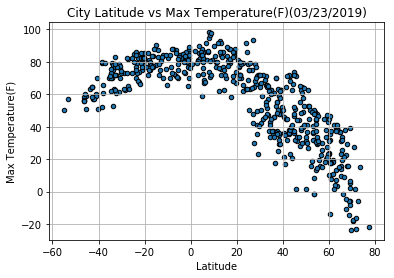

In [21]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Max Temperature(F)', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Max Temperature(F)({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_maxtemp.png")
#show plot
plt.show()

#### Latitude vs. Humidity Plot

In [ ]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Humidity', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Humidity({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_humidity.png")
#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Cloudiness', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Cloudiness({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_cloudiness.png")
#show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Wind Speed(mph)', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Windspeed(mph) ({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_windspeed.png")
#show plot
plt.show()